<a href="https://colab.research.google.com/github/JatinK169/MRM_TaskPhase/blob/main/MrmTaskPhase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CarPrice_Assignment.csv')
df
#!ls '/content/drive/MyDrive/Colab Notebooks'

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [73]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [74]:
df.shape

(205, 26)

In [75]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [76]:
df['CarName'].value_counts()

toyota corolla          6
toyota corona           6
peugeot 504             6
subaru dl               4
toyota mark ii          3
                       ..
audi 100 ls             1
plymouth valiant        1
isuzu MU-X              1
dodge coronet custom    1
nissan titan            1
Name: CarName, Length: 147, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density or Relative Frequency Of Cars By Price')

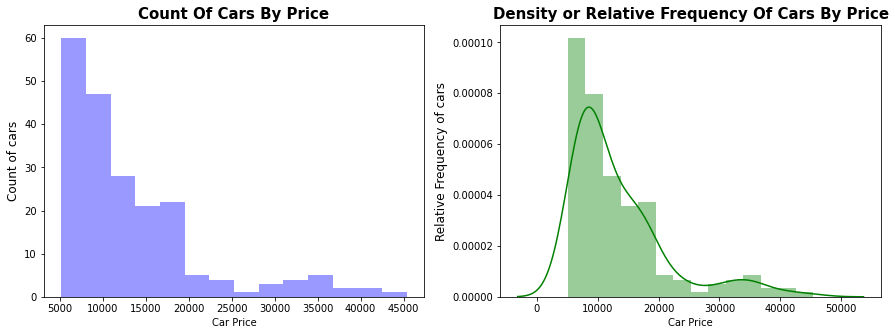

In [92]:
fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(df['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(df['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold")

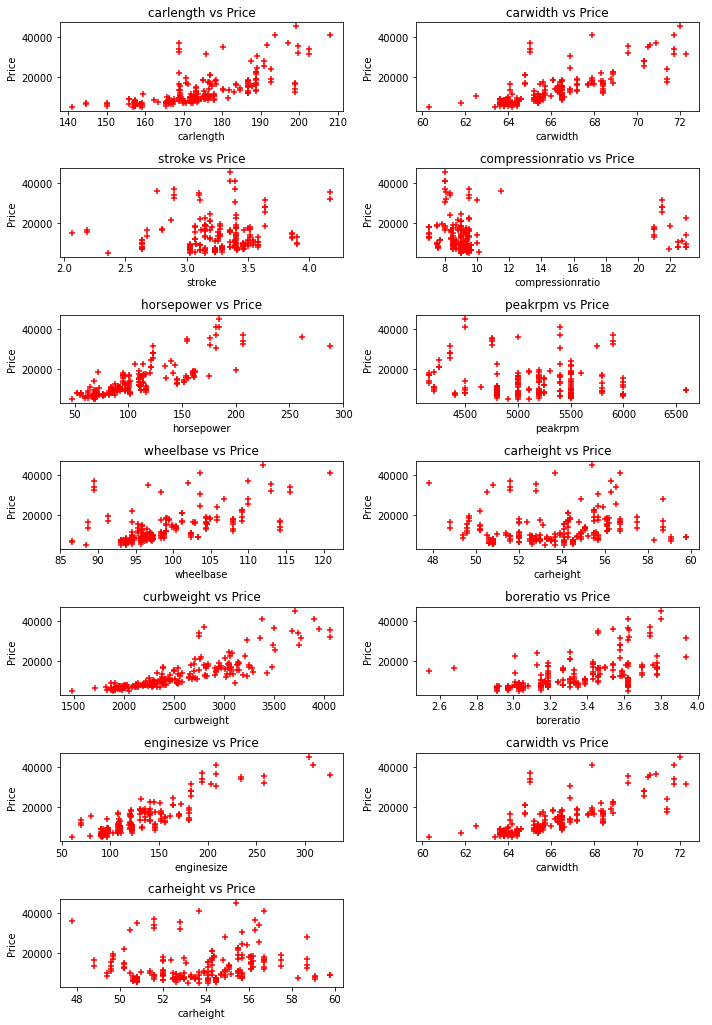

In [77]:
def scatter(x,fig):
    plt.subplot(10,2,fig)
    plt.scatter(df[x],df['price'],color='red',marker='+')
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('stroke', 3)
scatter('compressionratio', 4)
scatter('horsepower', 5)
scatter('peakrpm', 6)
scatter('wheelbase', 7)
scatter('carheight', 8)
scatter('curbweight', 9)
scatter('boreratio', 10)
scatter('enginesize', 11)
scatter('carwidth', 12)
scatter('carheight', 13)

plt.tight_layout()


In [78]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['CarName'] = encoder.fit_transform(df['CarName'])
df['fuelsystem'] = encoder.fit_transform(df['fuelsystem'])
df['fueltype'] = encoder.fit_transform(df['fueltype'])
df['enginetype'] = encoder.fit_transform(df['enginetype'])
df['cylindernumber'] = encoder.fit_transform(df['cylindernumber'])
df['enginelocation'] = encoder.fit_transform(df['enginelocation'])
df['drivewheel'] = encoder.fit_transform(df['drivewheel'])
df['carbody'] = encoder.fit_transform(df['carbody'])
df['doornumber'] = encoder.fit_transform(df['doornumber'])
df['aspiration'] = encoder.fit_transform(df['aspiration'])

In [122]:
x = df.iloc[:,1:-1].values
y = df.iloc[:, 25].values
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state = 7)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x_train = scaler.fit_transform(x_train)
scaler_x_test = scaler.fit_transform(x_test)

In [82]:
print(scaler_x_train.shape)
print(scaler_x_test.shape)

(174, 24)
(31, 24)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear = LinearRegression()
model = linear.fit(scaler_x_train,y_train)
y_pred = linear.predict(scaler_x_test)

In [ ]:
print("Train Accuracy",linear.score(scaler_x_train,y_train))
print("Test Accuracy",linear.score(scaler_x_test,y_test))
print("R2 Score",r2_score(y_test,y_pred))

Train Accuracy 0.9615428698490955
Test Accuracy 0.9441596967852769
R2 Score 0.9441596967852769


In [ ]:
linear.score(x,y)

-1065393.9353165552

In [ ]:
linear.intercept_

13374.70498275863

In [154]:
X = df[['horsepower', 'enginesize', 'citympg', 'highwaympg', 'curbweight', 'carlength', 'carwidth']]
xt = X.copy()
xt = xt/nm.max(xt)
xt = xt.values


rows, cols = xt.shape
intercept = nm.ones((rows,1))
xt = nm.append(xt, intercept, axis=1)
print(xt)


m = nm.random.randn(cols+1,1)
print(m)

[[0.38541667 0.39877301 0.42857143 ... 0.81114849 0.88658368 1.        ]
 [0.38541667 0.39877301 0.42857143 ... 0.81114849 0.88658368 1.        ]
 [0.53472222 0.46625767 0.3877551  ... 0.8226814  0.90594744 1.        ]
 ...
 [0.46527778 0.53067485 0.36734694 ... 0.90725613 0.95297372 1.        ]
 [0.36805556 0.44478528 0.53061224 ... 0.90725613 0.95297372 1.        ]
 [0.39583333 0.43251534 0.3877551  ... 0.90725613 0.95297372 1.        ]]
[[ 0.44790538]
 [-1.08103608]
 [ 0.16369981]
 [ 1.11709392]
 [ 0.91273192]
 [ 0.57386923]
 [-0.02827801]
 [-0.976828  ]]


In [155]:
y = df[['price']]
yt=y.copy()
yt = yt/nm.max(yt)
yt = yt.values
print(yt)

[[0.2972467 ]
 [0.36343612]
 [0.36343612]
 [0.30726872]
 [0.38436123]
 [0.33590308]
 [0.39008811]
 [0.41674009]
 [0.52588106]
 [0.39337372]
 [0.36189427]
 [0.37279736]
 [0.46189427]
 [0.46486784]
 [0.5410793 ]
 [0.67753304]
 [0.91002203]
 [0.8123348 ]
 [0.11345815]
 [0.13865639]
 [0.14482379]
 [0.12273128]
 [0.14046256]
 [0.17526432]
 [0.13720264]
 [0.14740088]
 [0.16759912]
 [0.1885022 ]
 [0.1964978 ]
 [0.28555066]
 [0.14270925]
 [0.15099119]
 [0.1189207 ]
 [0.14381057]
 [0.15702643]
 [0.16068282]
 [0.16068282]
 [0.17389868]
 [0.2003304 ]
 [0.19482379]
 [0.22676211]
 [0.28513216]
 [0.22786344]
 [0.14944934]
 [0.19639868]
 [0.19639868]
 [0.24334802]
 [0.71035242]
 [0.78303965]
 [0.79295154]
 [0.11442731]
 [0.1342511 ]
 [0.1496696 ]
 [0.14746696]
 [0.16288546]
 [0.2410793 ]
 [0.26090308]
 [0.30055066]
 [0.34460352]
 [0.19482379]
 [0.18711454]
 [0.23337004]
 [0.22566079]
 [0.23777533]
 [0.24768722]
 [0.40264317]
 [0.40405286]
 [0.56281938]
 [0.62220264]
 [0.62061674]
 [0.69603524]
 [0.75

In [165]:

n = len(y)
def gradientDescent(X, y, slope, alpha = 0.3, current_iterations = 0, stepsize = 1, costfunc = 0):
    while abs(stepsize) > 0.000001:
        h = nm.dot(X, slope) 
        slope = slope - alpha*(1/n)*(X.T.dot(h-y))
        prevcf = costfunc 
        costfunc =  nm.sum((h-y)**2)
        stepsize = prevcf - costfunc
        current_iterations = current_iterations+1
    return slope, costfunc


In [166]:
final, finalcf = gradientDescent(xt, yt, m)#training the model
print("Final Values of Theta:\n", final, "\nFinal Cost Function:", finalcf)


Final Values of Theta:
 [[ 0.31131578]
 [ 0.60257505]
 [-0.10658848]
 [ 0.14667273]
 [ 0.32093355]
 [-0.01879469]
 [ 0.51915251]
 [-0.74257251]] 
Final Cost Function: 1.1438902664724047


In [169]:
predictions = nm.dot(xt,final)
print("R^2:",nm.sum((predictions - nm.mean(yt))**2)/nm.sum((yt - nm.mean(yt))**2))

R^2: 0.8155458741736336


In [ ]:
def gradient_descent2(x,y):
  m= len(x)
  iteration = 1000
  learning_rate = 0.001
  m_cur = b_cur =0
  for i in range(iteration):
    y_pre = m_cur*x + b_cur
    md= -(2/n)*sum(x*(y-y_pre))
    bd= -(2/n)*sum(y-y_pre)
    m_cur = m_cur - learning_rate*md
    b_cur = b_cur - learning_rate*bd
    print("m[],b[],iteration".format(m_cur,b_cur,i))
  x=np.array([1,2,3,4,5])
  y= np.array([5,9,15,21,28]) 
  gradient_descent2(x,y) 
